# Análise do Nível de Manutenibilidade
<br>
#### Objetivo:<br>
É importante acompanhar se as issues de correção estão levando mais ou menos tempo, e se o software está com os números de defeitos aumentando ou diminuíndo, ou seja, se a sua modificabilidade está melhorando. Uma boa avaliação desses números é conseguir ter correções mais rápidas e sem efeitos colaterais.
Auxiliar futuras refatorações: Quais devem ser as principais para eliminar problemas;<br>
A partir de uma coleção de métricas coletadas automaticamente e de uma forma objetiva de interpretar seus valores, engenheiros de software podem monitorar características especícas do seu código assim como implementações problemáticas para tomar melhores decisões ao (re)escrevê-las.<br>
<br>
#### Vantagens:<br>
-- Possibilita a rápida identificação de falhas e permite ações de correções na mesma velocidade;<br>
-- O desenvolvimento e a aplicação de novos recursos fica mais fácil e rápido;<br>
-- Há um melhor controle de acesso autorizado para as revisões;<br>
-- Conflitos de mudanças são resolvidos com maior agilidade;<br>
-- Erros e códigos de risco são encontrados mais facilmente;<br>
-- Programadores passam a ter uma visão analítica objetiva, que possibilita e ajuda no reconhecimento de onde os mesmo foram ou não precisos e desatentos;<br>
-- ** Com a exclusão de determinadas classes de defeitos, a equipe se encontra concentrada em outros tipos de eficiência do projeto. **<br>
<br>
Não estou analizando:<br>
-- Complexidade Ciclomática (desvios uma função possui: cada comando if, switch, for, while);<br>
-- Metodos com muitos parametros;<br>
-- Outras métricas;<br>
<br>
#### Próximos trabalhos:<br>
-- Checkins com uma unit;<br>
-- Checkins de DFMs;<br>
-- Media de linhas por metodo;<br>
-- Cruzar dados do RTC;<br>
<br>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

arquivos = ['release_changeset_20171.csv', 'HorasPorSalt2017.csv', 'TFS 2017 pas.csv', 'TFS 2017 dfm.csv']
#arquivos = ['release_changeset_2016.csv', 'HorasPorSalt2016.csv', 'TFS 2016 pas.csv', 'TFS 2016 dfm.csv']
#arquivos = ['release_changeset_2013-2015', 'HorasPorSalt2015.csv', 'TFS 2015 pas.csv', 'TFS 2015 dfm.csv']

    Linhas                                             Metodo
0     2400               uspjPendenciaPrazo.ConsultaPendencia
1     1100           uspjDBase.ConsultaAtualizacaoInformacoes
2     1000                uspjMensagem.InicializaMensagensSPJ
3     1000              uspjMensagem2.InicializaMensagensSPJ2
4     1000               uspjPendenciaPrazo.AtualizePendencia
5      900         uspjDocEmitidoServ.OnDepoisSalvarDocumento
6      800                      uspjCDA.OrganizarDadosGeracao
7      800            uspjProcessoServ.ConsultaProcessoPeloWS
8      700      uspjPedidoProcurServ.AtualizaPedidoProcurador
9      700   uspjConsPendenciaPrazoRPdevBasica.PassaParametro
10     650   uspjCadProcessoMovBase.ccCadastroSpAntesExecutar
11     580             uspjConsCDA.PreenchaParametrosConsulta
12     550  uspjAtividadeIndependente.CriarCamposOutrasOpe...
13     540            uspjIntimacaoEletServ.ProcessaIntimacao
14     500      uspjProcessoServ.VerificaConsistenciaProcesso
15     5

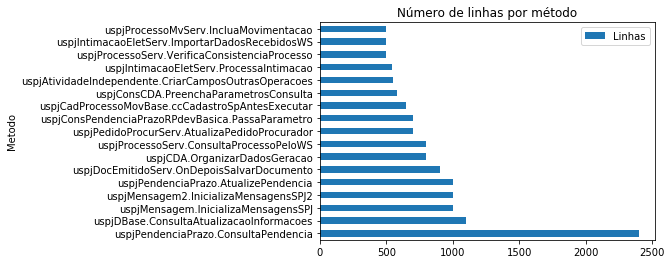

*** Algumas fontes a média de linhas por metodo é considerado ruim acima de 13.


In [2]:
dfLinhas = pd.DataFrame({'Metodo' : ['uspjPendenciaPrazo.ConsultaPendencia', 'uspjDBase.ConsultaAtualizacaoInformacoes', 'uspjMensagem.InicializaMensagensSPJ', 'uspjMensagem2.InicializaMensagensSPJ2', 'uspjPendenciaPrazo.AtualizePendencia', 'uspjDocEmitidoServ.OnDepoisSalvarDocumento', 'uspjCDA.OrganizarDadosGeracao', 'uspjProcessoServ.ConsultaProcessoPeloWS', 'uspjPedidoProcurServ.AtualizaPedidoProcurador', 'uspjConsPendenciaPrazoRPdevBasica.PassaParametro', 'uspjCadProcessoMovBase.ccCadastroSpAntesExecutar', 'uspjConsCDA.PreenchaParametrosConsulta', 'uspjAtividadeIndependente.CriarCamposOutrasOperacoes', 'uspjIntimacaoEletServ.ProcessaIntimacao', 'uspjProcessoServ.VerificaConsistenciaProcesso', 'uspjIntimacaoEletServ.ImportarDadosRecebidosWS', 'uspjProcessoMvServ.IncluaMovimentacao'],
                       'Linhas' : [2400, 1100, 1000, 1000, 1000, 900, 800, 800, 700, 700, 650, 580, 550, 540, 500, 500, 500]})
dfLinhas.set_index('Metodo')
print (dfLinhas)

plLinhas = dfLinhas.set_index('Metodo').plot(kind='barh')
plt.title("Número de linhas por método")
plt.show()

print ("*** Algumas fontes a média de linhas por metodo é considerado ruim acima de 13.");


In [164]:
dfHeadlistPas = pd.read_csv(arquivos[2], encoding='ISO-8859-1', delimiter=',')
#dfHeadlistPas = dfHeadlistPas.drop('cfi', axis=1)
dfHeadlistPas = dfHeadlistPas.query('quantum > 15')
dfHeadlistPas = dfHeadlistPas.assign(file=dfHeadlistPas['itemName'].str.split("/"))
#dfHeadlistPas['file'] = dfHeadlistPas['file'][-1]
#dfHeadlistPas['file'][0][-1]

#f = lambda x: len(x["review"].split("disappointed")) -1
#reviews["disappointed"] = reviews.apply(f, axis=1)

files = []
for row in dfHeadlistPas['itemName']:
    files.append(row.split('/')[-1])
dfHeadlistPas['file'] = files
dfHeadlistPas = dfHeadlistPas.drop('itemName', axis=1).drop('cfi', axis=1)
dfHeadlistPas

,quantum,size,file
0,65,1287753,uspjProcessoServ.pas
1,62,195506,uspjConstante.pas
2,62,729760,uspjFuncoes.pas
3,50,60614,uspjMensagem3.pas
4,42,264451,uspjIntimacaoeletServ.pas
5,35,491098,uspjDocEmitidoServ.pas
6,33,173519,uspjVisualizaProcesso.pas
7,33,560860,uspjEdicaoDocumento.pas
8,29,105683,uspjCitacaoEletServ.pas
9,28,345250,uspjAtividadeIndependenteCliente.pas


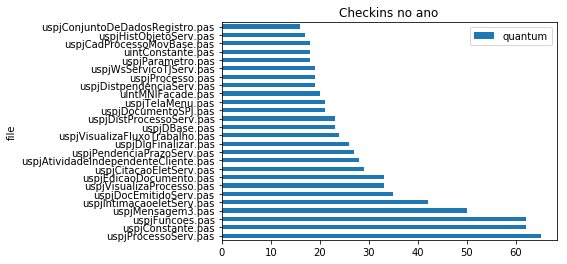

In [175]:
plLinhas = dfHeadlistPas.drop('size', axis=1).set_index('file').plot(kind='barh')
plt.title("Checkins no ano")
plt.show()

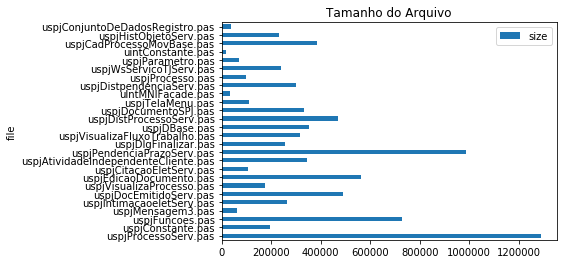

In [180]:
columnsTitles = ['size', 'file'] #pupilo
dfHeadlistPas.reindex(columns=columnsTitles)

plLinhas = dfHeadlistPas.drop('quantum', axis=1).set_index('file').plot(kind='barh')
plt.title("Tamanho do Arquivo")
plt.show()

In [185]:
dfHeadlistDfm = pd.read_csv(arquivos[3], encoding='ISO-8859-1', delimiter=',')
#dfHeadlistDfm = dfHeadlistPas.drop('cfi', axis=1)
dfHeadlistDfm = dfHeadlistDfm.query('quantum > 2')
dfHeadlistDfm = dfHeadlistDfm.assign(file=dfHeadlistDfm['itemName'].str.split("/"))
#dfHeadlistDfm['file'] = dfHeadlistPas['file'][-1]
#dfHeadlistDfm['file'][0][-1]

#f = lambda x: len(x["review"].split("disappointed")) -1
#reviews["disappointed"] = reviews.apply(f, axis=1)

files = []
for row in dfHeadlistDfm['itemName']:
    files.append(row.split('/')[-1])
dfHeadlistDfm['file'] = files
dfHeadlistDfm = dfHeadlistDfm.drop('itemName', axis=1).drop('cfi', axis=1)
dfHeadlistDfm

,quantum,size,file
0,11,965551,uspjTelaMenu.dfm
1,11,377542,uspjVisualizaFluxoTrabalho.dfm
2,7,49538,uspjCadCategoria.dfm
3,7,88284,uspjExportarDocumentosLote.dfm
4,5,89829,uspjCadOrgaoJudicialProc.dfm
5,5,268509,uspjDlgFinalizar.dfm
6,5,350394,uspjVisualizaProcesso.dfm
7,4,128193,uspjCadLocal.dfm
8,4,148583,uspjEdicaoDocumento.dfm
9,3,8711,ufrmPrincipal.dfm


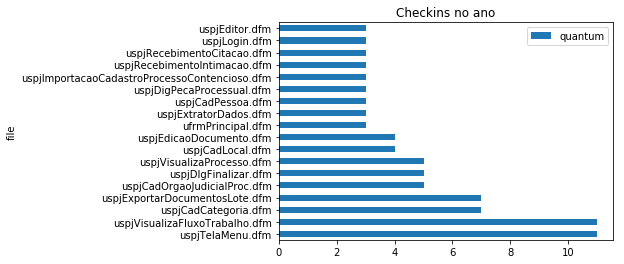

In [187]:
plLinhas = dfHeadlistDfm.drop('size', axis=1).set_index('file').plot(kind='barh')
plt.title("Checkins no ano")
plt.show()

<http://sonarunj/components/index/9848>

***
### Changeset

Extraido do TFS:<br>
```python
tf hist /noprompt /recursive /format:detailed /version:D"1/1/2015"~D"31/12/2015" $/fPJ/PJ/build/release > 
```


** Utilizado arquivo TFS.ipynb para conversão em CSV.

In [3]:
dfChangesets = pd.read_csv(arquivos[0], encoding='ISO-8859-1', delimiter=';', header=None, 
                 names= ["Salt", "Changeset", "Desenv", "Data", "Descricao", "File", "Filename"])
dfChangesets
#df.describe() #pupilo como esconder o out?

,Salt,Changeset,Desenv,Data,Descricao,File,Filename
0,0/0,553789,felipe.caputo,27/12/2017,Implementada invalidação de cache para quando ...,uintCommon.pas,/fPJ/PJ/build/release/4.20/servicepack/pjDev/s...
1,0/0,553789,felipe.caputo,27/12/2017,Implementada invalidação de cache para quando ...,uintWsProcessadorConsultarTeorComunicacao.pas,/fPJ/PJ/build/release/4.20/servicepack/pjDev/s...
2,247275/4,553788,emerson.db1,27/12/2017,SALT 247275/4 - Feature 121967 - [24] - Distri...,dbChange.xml,/fPJ/PJ/build/release/4.20/servicepack/pjDev/d...
3,247275/4,553788,emerson.db1,27/12/2017,SALT 247275/4 - Feature 121967 - [24] - Distri...,PJ011829.DH4,/fPJ/PJ/build/release/4.20/servicepack/pjDev/d...
4,247275/4,553788,emerson.db1,27/12/2017,SALT 247275/4 - Feature 121967 - [24] - Distri...,PJ011829.DH4,/fPJ/PJ/build/release/4.20/servicepack/pjDev/d...
5,247275/4,553788,emerson.db1,27/12/2017,SALT 247275/4 - Feature 121967 - [24] - Distri...,PJ011829.DH4,/fPJ/PJ/build/release/4.20/servicepack/pjDev/d...
6,247275/4,553788,emerson.db1,27/12/2017,SALT 247275/4 - Feature 121967 - [24] - Distri...,uspjCadConfiguracaoProcAdministrativosPrecator...,/fPJ/PJ/build/release/4.20/servicepack/pjDev/s...
7,247275/4,553788,emerson.db1,27/12/2017,SALT 247275/4 - Feature 121967 - [24] - Distri...,uspjCadConfiguracaoProcAdministrativosPrecator...,/fPJ/PJ/build/release/4.20/servicepack/pjDev/s...
8,247275/4,553788,emerson.db1,27/12/2017,SALT 247275/4 - Feature 121967 - [24] - Distri...,uspjCadCriterioDistComOrgao.dfm,/fPJ/PJ/build/release/4.20/servicepack/pjDev/s...
9,247275/4,553788,emerson.db1,27/12/2017,SALT 247275/4 - Feature 121967 - [24] - Distri...,uspjCadCriterioDistComOrgao.pas,/fPJ/PJ/build/release/4.20/servicepack/pjDev/s...


In [103]:
dfChangesets.describe()
dfChangesets.shape
dfChangesets.dtypes

Salt         object
Changeset     int64
Desenv       object
Data         object
Descricao    object
File         object
Filename     object
dtype: object

['felipe.caputo' 'emerson.db1' 'robledo.fortuna' 'anderson.albuquerque'
 'darlley.silva' 'nimitz' 'orlando.werner' 'murilo.guollo' 'cassio.roos'
 'andre.langner' 'wilian.ivo' 'juliano' 'carlos.ignacio' 'ulisses.campos'
 'taissiane.moroso' 'guilherme.araujo' 'Rigoni' 'fabio.schunig'
 'valdenir.albino' 'robson.db1' 'roni.beltramin' 'william.colombo' 'versao'
 'luhan.silva' 'gessileini.clinio' 'cesar.pamplona' 'henrique.ramos'
 'rafael.wagner' 'rafael.damasco' 'mathias.silva' 'romulo' 'celio.assis'
 'ulder.junior' 'cesar' 'leandro.vaso' 'maciel.zang' 'rafael.db1'
 'luiz.db1' 'raphael.batista' 'christian.salinas' 'adriane.col'
 'francisco.gomes' 'luiz.faria' 'roberto.junior' 'jefferson.pereira'
 'joel.zurawski' 'joao.taraciuk' 'douglas.zuliani' 'daniel.junior'
 'michelle.sander' 'polegato' 'johnathan.vieira' 'willian.reis']


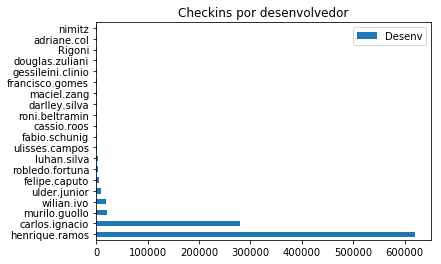

In [37]:
def GraficoDesenv(df):
    print (df.Desenv.unique())
    Files = df.Desenv.value_counts().to_frame() #index #.tolist()
    Files[:20].plot(kind='barh')
    plt.title("Checkins por desenvolvedor")
    plt.show()
    
GraficoDesenv(dfChangesets)

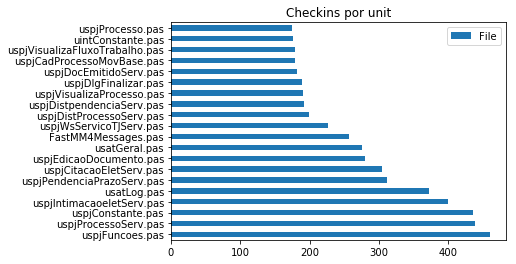

In [4]:
#df.groupby('File').count()
#Files = df.File.value_counts()
Files = dfChangesets.File.value_counts().to_frame() #index #.tolist()
Files = Files.filter(like='.pas', axis=0)

Files[:20].plot(kind='barh')
plt.title("Checkins por unit")
plt.show()

# Salts

Dados exportados do SAC via SQL.<br>

> OndeDrive/SAC/Horas.sql
```sql
SELECT DISTINCT 
       ia.NUATENDIMENTO,
       IA.NUITEM,
     ia.NUATENDIMENTO || '/' || IA.NUITEM AS SALT,
       RA.CDORIGEMATEND AS ORIGEM,
       --ra.NUSEQVERSAO,
       ve.NURELEASE,
       /*(SELECT COUNT(1)
                 FROM SAC.ESACATIVIDADE AA
                WHERE AA.CDPROJETO = IA.CDPROJETO
                  AND AA.NUATENDIMENTO = IA.NUATENDIMENTO
                  AND AA.NUITEM = IA.NUITEM
                  AND AA.CDTIPOATIVIDADE = 120) AS PRIORIDADES_SOLICITADAS,
       CASE WHEN IA.DTLIMSOLUCAO < CURRENT DATE THEN 'VENCIDA' ELSE 'DENTRO_PRAZO' END SITUACAO_SLA,*/
       CLI.SGCLIENTE AS CLIENTE,
       IA.DTREGISTRO AS DATA_CADASTRO,
       IA.DTLIMSOLUCAO AS DATA_SLA,
       CASE IA.CDPRIORIDADE 
         WHEN 6 THEN 'ZERO/CRÍTICA'
         WHEN 5 THEN 'UM/IMPEDITIVA'
         WHEN 1 THEN 'DOIS/ALTA'
         WHEN 2 THEN 'TRES/MÉDIA'
         WHEN 3 THEN 'QUATRO/BAIXA'
         WHEN 4 THEN 'INDEFINIDA'
       END SEVERIDADE,
       CASE IA.CDPRIORIDADE 
         WHEN 6 THEN 8
         WHEN 5 THEN 5
         WHEN 1 THEN 4
         WHEN 2 THEN 3
         WHEN 3 THEN 2
         WHEN 4 THEN 3
       END PONTUACAO_SEVERIDADE,
       SIT.DESITUACAOATEND AS SITUACAO_SALT,
       /*CASE WHEN (SELECT COUNT(1)
                 FROM SAC.ESACATIVIDADE AA
                WHERE AA.CDPROJETO = IA.CDPROJETO
                  AND AA.NUATENDIMENTO = IA.NUATENDIMENTO
                  AND AA.NUITEM = IA.NUITEM
                  AND AA.CDTIPOATIVIDADE IN (243,303)) > 0 THEN 'SIM' ELSE 'NÃO' END AS REJEITE,*/
       AA.NUSEQATIVIDADE,
       AA.CDTIPOATIVIDADE,
       TA.DETIPOATIVIDADE,
       AA.DTREALINICIO,
       AA.DTREALFINAL,
       '0' || CAST(AA.QTHORASREAL AS VARCHAR(10)) AS QTHORASREAL,
    (SELECT '0' || CAST(SUM(AA.QTHORASREAL) AS VARCHAR(10))
                 FROM SAC.ESACATIVIDADE AA
                WHERE AA.CDPROJETO = IA.CDPROJETO
                  AND AA.NUATENDIMENTO = IA.NUATENDIMENTO
                  AND AA.NUITEM = IA.NUITEM
                  --AND AA.CDTIPOATIVIDADE IN (243,303)
                  ) AS HORASTOTAIS
  FROM sac.ESACREGISTROATEND ra
 LEFT JOIN sac.ESACVERSAO ve
    ON ra.CDPROJETO = ve.CDPROJETO
   AND ra.CDSISTEMA = ve.CDSISTEMA
   AND ra.NUSEQVERSAO = ve.NUSEQVERSAO
  JOIN sac.ESACITEMATEND ia
    ON ia.cdProjeto = ia.CDPROJETO
   AND ia.NUATENDIMENTO = ra.NUATENDIMENTO
  JOIN SAC.ESACSITUACAOATEND SIT
    ON SIT.CDSITUACAOATEND = IA.CDSITUACAOATEND
  JOIN sac.ESACATIVIDADE a
    ON a.cdProjeto = ia.CDPROJETO
   AND a.NUATENDIMENTO = ia.NUATENDIMENTO
   AND a.NUITEM = ia.NUITEM
   AND a.CDTIPOATIVIDADE in (162)
  JOIN SAC.ESACCLIENTE CLI
    ON CLI.CDCLIENTE = ra.CDCLIENTE    
  JOIN SAC.ESACATIVIDADE AA
    ON AA.CDPROJETO = IA.CDPROJETO
   AND AA.NUATENDIMENTO = IA.NUATENDIMENTO
   AND AA.NUITEM = IA.NUITEM    
 LEFT  JOIN SAC.ESACTIPOATIVIDADE TA
    ON AA.CDTIPOATIVIDADE = TA.CDTIPOATIVIDADE
 WHERE ra.cdProjeto = 3
--   AND ra.CDORIGEMATEND = 10
   AND ra.CDSISTEMA IN (31,93)
--   AND ra.CDCLIENTE <> 3969
--   AND a.DTENCERRAMENTO IS NULL
--   AND ia.DTLIMSOLUCAO IS NOT NULL
--   AND SIT.CDSITUACAOATEND=65
   AND VARCHAR_FORMAT (ia.DTREGISTRO,'YYYY-MM-DD') > '2017-01-01'
--AND ra.NUATENDIMENTO = 263466
ORDER BY ia.NUATENDIMENTO, IA.NUITEM, AA.NUSEQATIVIDADE
```


In [4]:
dfSalts = pd.read_csv(arquivos[1], encoding='ISO-8859-1', delimiter=',')
dfSalts

,NUATENDIMENTO,NUITEM,SALT,ORIGEM,NURELEASE,CLIENTE,DATA_CADASTRO,DATA_SLA,SEVERIDADE,PONTUACAO_SEVERIDADE,SITUACAO_SALT,NUSEQATIVIDADE,CDTIPOATIVIDADE,DETIPOATIVIDADE,DTREALINICIO,DTREALFINAL,QTHORASREAL,HORASTOTAIS
0,4,2,4/2,8,03020100,EQUIPE-SAJ,2017-03-02 16:59:16,NaN,UM/IMPEDITIVA,5,Pendente,1,310,Apontamento de Horas,2017-03-02,2017-03-02,0.016,0.016
1,1000,1,1000/1,8,03030101,EQUIPE-SAJ,2017-05-11 13:39:16,NaN,INDEFINIDA,3,Encerrado,2,16,Avaliação do atendimento,2017-05-11,2017-05-11,0.750,0.750
2,1000,1,1000/1,8,03030101,EQUIPE-SAJ,2017-01-18 12:03:04,NaN,DOIS/ALTA,4,Encerrado,2,16,Avaliação do atendimento,2017-01-18 17:46:04,2017-01-18 17:46:04,3.500,4.500
3,1000,1,1000/1,8,03030101,EQUIPE-SAJ,2017-01-18 12:03:04,NaN,DOIS/ALTA,4,Encerrado,3,283,Revisão de código,2017-01-18,2017-01-18,1.000,4.500
4,1003,1,1003/1,8,03030101,EQUIPE-SAJ,2017-05-11 16:46:57,NaN,INDEFINIDA,3,Encerrado,2,16,Avaliação do atendimento,2017-05-11,2017-05-11,0.750,0.750
5,1003,1,1003/1,8,03030101,EQUIPE-SAJ,2017-01-20 15:21:58,NaN,UM/IMPEDITIVA,5,Encerrado,2,16,Avaliação do atendimento,2017-02-01,2017-02-01,1.000,1.000
6,12110,1,12110/1,8,02000000,EQUIPE-SAJ,2017-04-03 10:11:10,NaN,INDEFINIDA,3,Encerrado,1,16,Avaliação do atendimento,2017-04-05,2017-04-05,0.016,0.016
7,12117,1,12117/1,8,02000001,EQUIPE-SAJ,2017-04-26 16:06:22,NaN,TRES/MÉDIA,3,Encerrado,1,918,Atendimento ao Cliente/Suporte,2017-04-26 16:08:14,2017-04-26 16:08:14,0.500,0.500
8,12149,1,12149/1,10,01000304,PGE/PB,2017-10-25 15:02:54,2017-10-31 15:01:59,INDEFINIDA,3,Encerrado,1,918,Atendimento ao Cliente/Suporte,2017-10-20 15:03:47,2017-10-20 15:03:47,1.000,1.000
9,54056,1,54056/1,10,03030704,PGE/SP,5006-08-31,NaN,TRES/MÉDIA,3,Encerrado,1,77,Cadastro do atendimento,2006-09-04,2006-09-04,0.116,0.449


In [6]:
df_filtered = dfSalts[dfSalts['SALT'] == '12149/1']
df_filtered

,NUATENDIMENTO,NUITEM,SALT,ORIGEM,NURELEASE,CLIENTE,DATA_CADASTRO,DATA_SLA,SEVERIDADE,PONTUACAO_SEVERIDADE,SITUACAO_SALT,NUSEQATIVIDADE,CDTIPOATIVIDADE,DETIPOATIVIDADE,DTREALINICIO,DTREALFINAL,QTHORASREAL,HORASTOTAIS
8,12149,1,12149/1,10,01000304,PGE/PB,2017-10-25 15:02:54,2017-10-31 15:01:59,INDEFINIDA,3,Encerrado,1,918,Atendimento ao Cliente/Suporte,2017-10-20 15:03:47,2017-10-20 15:03:47,1.0,1.0


In [64]:
#dfSalts.DETIPOATIVIDADE.unique()

dfAtividades = dfSalts.groupby(['DETIPOATIVIDADE'])

dfAtividades.describe()
#dfAtividades['QTHORASREAL'].aggregate(np.sum).to_frame()


CDTIPOATIVIDADE          \
                                                             count    mean   
DETIPOATIVIDADE                                                              
 Diretoria e Setor Comercial                                   7.0    70.0   
Acompanhamento da Operação                                  1568.0  1222.0   
Administração Remota do Ambiente                             508.0  1223.0   
Administração/Gerenciamento de Servidor                        5.0   227.0   
Afastamentos médicos com atestado                              2.0   317.0   
Ag. aceite - Cancelamento                                   1694.0   644.0   
Ag. aceite - Prorrogação                                     345.0   643.0   
Ag. aceite - Solução contorno                                  2.0   645.0   
Ag. cliente - Acesso ambiente                                 35.0   640.0   
Ag. cliente - Recategorização                                606.0   642.0   
Ag. cliente - Subsídio técnico                               639.0   655.0   
Aguardando aceite final                                     6887.0   302.0   
Aguardando aceite parcial                                   1167.0   301.0   
Aguardando aprovação orçamento                                10.0   158.0   
Aguardando avaliação da resposta do cliente                 1391.0   268.0   
Aguardando cliente                                          1886.0    17.0   
Aguardando horário para atualizar versão                      64.0   674.0   
Aguardando suporte de infraestrutura                          10.0   284.0   
Aguardando suporte de terceiros                               15.0    21.0   
Alteração no Modelo de Dados                                   2.0    42.0   
Analise de implantação e aceite                                1.0  1012.0   
Análise Falha - Atualização de versão                          3.0   680.0   
Análise Falha - Intervenção na base de dados                   2.0   681.0   
Análise de Negócio                                           176.0   879.0   
Análise de Requisitos                                          1.0   880.0   
Análise e projeto de sistema                                   1.0    46.0   
Apontamento de Horas                                          15.0   310.0   
Atendimento ao Cliente/Suporte                               330.0   918.0   
Atendimento ao cliente por telefone                            5.0    48.0   
Ativ. que calcula hrs de prorrogação SLA - Rejeite            80.0   751.0   
...                                                            ...     ...   
Projetos internos - Análise e Configurações                    1.0  1241.0   
Projetos internos - DBAs                                       1.0  1242.0   
Qualidade e Metodologia                                        1.0   912.0   
Repasse de orientação ao Suporte SAJ                         627.0   266.0   
Reunião                                                        8.0    14.0   
Reunião de retrospectiva                                       1.0   199.0   
Reunião de review                                              4.0   198.0   
Revisar código                                                 1.0   338.0   
Revisão Textual                                                1.0   106.0   
Revisão da solução da SALT                                     3.0   111.0   
Revisão de contagem                                           13.0   258.0   
Revisão de código                                              1.0   283.0   
Roteamento Suporte                                          8131.0   244.0   
Script                                                        58.0    15.0   
Sincronizar fontes                                           173.0   339.0   
Sincronização de fontes para versão de correção              615.0    51.0   
Solicitação de Análise Crítica (UNJ)                         251.0   646.0   
Solicitação de prioridade                                    920.0   120.

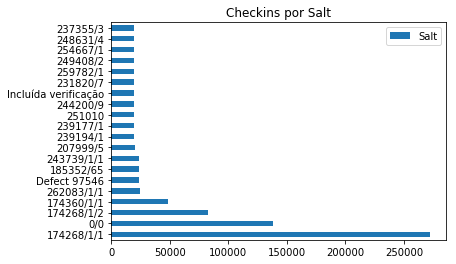

In [7]:
Salts = dfChangesets.Salt.value_counts().to_frame() #index #.tolist()
#Files[:20].plot(kind='barh')
#Files = Files.filter(like='.pas', axis=0)

Salts[:20].plot(kind='barh')
plt.title("Checkins por Salt")
plt.show()

In [8]:
Salts

,Salt
174268/1/1,272349
0/0,137689
174268/1/2,82675
174360/1/1,48610
262083/1/1,24448
Defect 97546,23412
185352/65,23401
243739/1/1,23346
207999/5,19905
239194/1,19761


In [90]:
Salts = dfChangesets.Salt.value_counts()#.to_frame()
Salts = Salts.loc[Salts>1050]
Salts = Salts.to_frame().reset_index()
Salts = Salts.drop('Salt', axis=1)
Salts = Salts.set_index("index")
Salts

""
index
Defect 97546
Incluída verificação


In [58]:
dfSalts[[False]*63775+[True]]

,NUATENDIMENTO,NUITEM,SALT,ORIGEM,NURELEASE,CLIENTE,DATA_CADASTRO,DATA_SLA,SEVERIDADE,PONTUACAO_SEVERIDADE,SITUACAO_SALT,NUSEQATIVIDADE,CDTIPOATIVIDADE,DETIPOATIVIDADE,DTREALINICIO,DTREALFINAL,QTHORASREAL,HORASTOTAIS
63775,263790,1,263790/1,10,04200121,PG/DF,2017-12-29 15:47:46,2017-12-30 15:47:46,UM/IMPEDITIVA,5,Ag. Roteamento Suporte,2,244,Roteamento Suporte,NaN,NaN,NaN,NaN


In [10]:
dfSalts['SALT'].values

array(['4/2', '1000/1', '1000/1', ..., '263782/1', '263788/1', '263790/1'], dtype=object)

In [72]:
Salts.index.values

array(['174268/1/1', '0/0', '174268/1/2', '174360/1/1', '262083/1/1',
       'Defect 97546', '185352/65', '243739/1/1', '207999/5', '239194/1',
       '239177/1', '251010', '244200/9', 'Incluída verificação',
       '231820/7', '259782/1', '249408/2', '254667/1', '248631/4',
       '237355/3', '252184/1', '224719/74', '228388/2', '233701/18',
       '250005/1', '1/1'], dtype=object)

In [62]:
boolean_array = []
for i in dfSalts['SALT'].values:
    boolean_array.append(i in Salts.index.values)
#pupilo Nao retirou corretamente`
boolean_array_changesets = []
for i in dfChangesets['Salt'].values:
    boolean_array_changesets.append(i in Salts.index.values)

[i for i in boolean_array if i == False]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


In [82]:
#dfChangesets = dfChangesets.query('Salt not in (174268/1/1, 0/0, 174268/1/2, 174360/1/1, 262083/1/1, 185352/65, 243739/1/1, 207999/5, 239194/1, 239177/1, 251010, 244200/9, 231820/7, 259782/1, 249408/2, 254667/1, 248631/4, 237355/3, 252184/1, 224719/74, 228388/2, 233701/18, 250005/1, 1/1)')
dfChangesets = dfChangesets.query('Salt not in ("174268/1/1", "0/0", "174268/1/2", "174360/1/1", "262083/1/1", "185352/65", "243739/1/1", "207999/5", "239194/1", "239177/1", "251010", "244200/9", "231820/7", "259782/1", "249408/2", "254667/1", "248631/4", "237355/3", "252184/1", "224719/74", "228388/2", "233701/18", "250005/1", "1/1")')
dfChangesets.shape

(42873, 8)

In [85]:
print(dfSalts.shape)
print(dfChangesets.shape)
print(Salts.shape)

print(dfSalts[boolean_array].shape) #dfSalts =
#dfChangesets = dfChangesets[boolean_array_changesets]
#print(dfChangesets[boolean_array_changesets].shape)
print(dfSalts[boolean_array]['SALT'].value_counts())


(63776, 18)
(42873, 8)
(26, 0)
(123, 18)
250005/1     21
249408/2     13
248631/4     11
259782/1     11
239194/1     11
244200/9     10
237355/3     10
254667/1      9
231820/7      9
233701/18     8
239177/1      6
252184/1      4
Name: SALT, dtype: int64


In [12]:
'1/1' in Salts.index

True

['adriane.col' 'carlos.ignacio' 'gessileini.clinio' 'murilo.guollo']


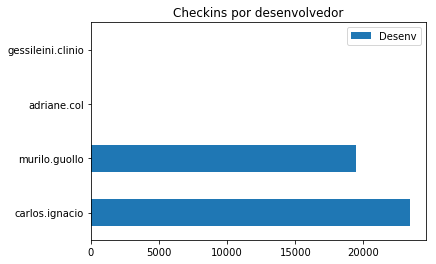

In [86]:
#GraficoDesenv(dfChangesets[boolean_array_changesets])
GraficoDesenv(dfChangesets)

In [87]:
#filtrar os defects e corrigir com o número da salt (também remove salts NaN)
#para isso gerar um arquivo no RTC: defect|salt|colaborador|horas
#enquanto isso estou retirando esses changesets

dfChangesetsArray = dfChangesets
dfChangesetsArray.set_index('Salt');
#dfChangesets[(dfChangesetsArray.Salt[:6] == 'Defect')]
#dfChangesets = dfChangesetsArray.mask(lambda x: x['Salt'][:6] == 'Defect')
#dfChangesets = dfChangesetsArray.Salt.str.contains('Defect')
#dfChangesets = dfChangesetsArray.Salt.str.startswith( )
dfChangesetsArray = dfChangesetsArray.Salt.str.contains('/')

dfChangesets[dfChangesetsArray]#dfChangesets = 
#dfChangesets
GraficoDesenv(dfChangesets[dfChangesetsArray])

[]


TypeError: Empty 'DataFrame': no numeric data to plot

In [88]:
# um unico checkin:|unit|tempo suporte|tempo desenv
Salts = dfChangesets.Salt.value_counts()#.to_frame()
#Salts = Salts.to_frame().reset_index()
#Salts = Salts.drop('Salt', axis=1)
#Salts = Salts.set_index("index")
#Salts['0/0']

conta = []
for row in dfChangesets['Salt']:
    if row in Salts:
        conta.append(Salts[row])
    else:
        conta.append(0)
dfChangesets['conta'] = conta


In [89]:
dfHoras = dfSalts
dfHoras.set_index('SALT')

dfQuantidadeCheckins = dfChangesets
dfQuantidadeCheckins.set_index('Salt')

#dfHoras
#'256856/9' in dfHoras['SALT'].values
#min(dfHoras[dfHoras['SALT'] == '256856/9'].HORASTOTAIS)

#dfChangesets.query('conta == 3')
#dfChangesets

horas = []
for row in dfChangesets['Salt']:
    if row in dfHoras['SALT'].values:
        if row in dfQuantidadeCheckins['Salt'].values:
            quantidade_checkins = min(dfQuantidadeCheckins[dfQuantidadeCheckins['Salt'] == row].conta)
        else:
            quantidade_checkins = 1
        horas.append(min(dfHoras[dfHoras['SALT'] == row].HORASTOTAIS) / quantidade_checkins)
    else:
        horas.append(0)
dfChangesets['horas'] = horas

dfChangesets

,Salt,Changeset,Desenv,Data,Descricao,File,Filename,conta,horas
283885,Defect 97546,521116,adriane.col,9/6/2017,Defect 97546 - Ajuste nas consultas de validaç...,uspjValidacaoEncerramentoPendencias.pas,/fPJ/PJ/build/release/4.21/servicepack/pjDev/s...,23412,0
283886,Defect 97546,521116,adriane.col,9/6/2017,Defect 97546 - Ajuste nas consultas de validaç...,uspjPendenciaPrazoServ.pas,/fPJ/PJ/build/release/4.21/servicepack/pjDev/s...,23412,0
283887,Defect 97546,521114,adriane.col,9/6/2017,Defect 97546 - Ajuste nas consultas de validaç...,uspjValidacaoEncerramentoPendencias.pas,/fPJ/PJ/build/release/4.20/servicepack/pjDev/s...,23412,0
283888,Defect 97546,521114,adriane.col,9/6/2017,Defect 97546 - Ajuste nas consultas de validaç...,uspjPendenciaPrazoServ.pas,/fPJ/PJ/build/release/4.20/servicepack/pjDev/s...,23412,0
283889,Defect 97546,521111,adriane.col,9/6/2017,Defect 97546 - Ajuste nas consultas de validaç...,uspjValidacaoEncerramentoPendencias.pas,/fPJ/PJ/build/release/4.0.18/servicepack/pjDev...,23412,0
283890,Defect 97546,521111,adriane.col,9/6/2017,Defect 97546 - Ajuste nas consultas de validaç...,uspjPendenciaPrazoServ.pas,/fPJ/PJ/build/release/4.0.18/servicepack/pjDev...,23412,0
285482,Defect 97546,521058,adriane.col,8/6/2017,Defect 97546 - Ajuste nas consultas de validaç...,uspjValidacaoEncerramentoPendencias.pas,/fPJ/PJ/build/release/4.0.17/servicepack/pjDev...,23412,0
285483,Defect 97546,521058,adriane.col,8/6/2017,Defect 97546 - Ajuste nas consultas de validaç...,uspjPendenciaPrazoServ.pas,/fPJ/PJ/build/release/4.0.17/servicepack/pjDev...,23412,0
285484,Defect 97546,521055,carlos.ignacio,8/6/2017,Branched from $/fPJ/PJ/build/main/pjDev - Cria...,4.20,/fPJ/PJ/build/release/4.20,23412,0
285485,Defect 97546,521055,carlos.ignacio,8/6/2017,Branched from $/fPJ/PJ/build/main/pjDev - Cria...,servicepack,/fPJ/PJ/build/release/4.20/servicepack,23412,0


In [92]:
dfChangesets.query('horas > 0')

,Salt,Changeset,Desenv,Data,Descricao,File,Filename,conta,horas


In [ ]:
# remover do changeset salts de 1inclusao de nova versao (Henrique, Ignacio)
# criar um df salt e itens checados
# quantidade de horas por unit (dividindo igualmente por unit)

# verificar deixar apenas atividades de desenv
# criar um df salt e horas total
# criar um df |SALT|File|Horas Total Salt/Itens Checados|
#Salts que estouraram por unit
#Salts por por severidade por unit
